In [1]:
import ROOT
from tqdm import tqdm
import math

Welcome to JupyROOT 6.24/06


Compare the difference between semilep channel and MET channel

In [ ]:
f1 = ROOT.TFile.Open("/Users/longwang/Desktop/datacards/Znn/shapefile_hists_2018_RBDT_Wmunu_High.root")
f2 = ROOT.TFile.Open("/Users/longwang/Desktop/datacards/Znn/shapefile_hists_2018_RBDT_Znn_High.root")

In [3]:
h1Sig = f1.Get("SemiLep/VHH_CV_1_C2V_1_kl_1_hbbhbb")
h1Bkg = f1.Get("SemiLep/TT")
h1TTB = f1.Get("SemiLep/TTB")
h1Bkg.Add(h1TTB)

h2Sig = f2.Get("SemiLep/VHH_CV_1_C2V_1_kl_1_hbbhbb")
h2Bkg = f2.Get("SemiLep/TT")
h2TTB = f2.Get("SemiLep/TTB")
h2Bkg.Add(h2TTB)

True

In [4]:
def significance(Nsig, Nbkg):
    return Nsig/math.sqrt(Nsig+Nbkg+pow(0.1*Nbkg, 2))

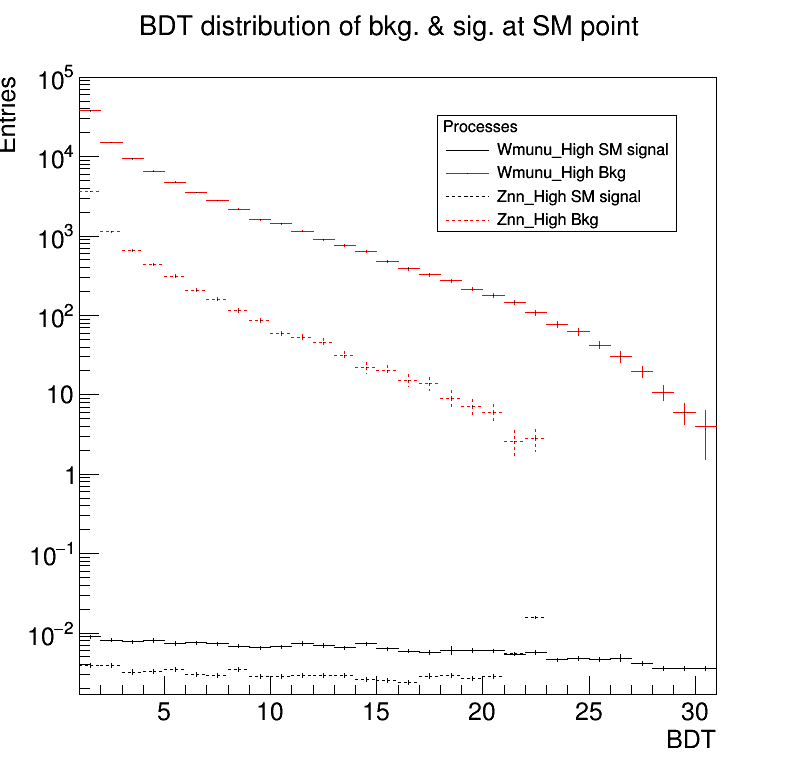

In [5]:
ROOT.gStyle.SetOptStat(0)
#ROOT.gStyle.SetPaintTextFormat
c = ROOT.TCanvas('c','c',800,800)

c.cd()
ROOT.gPad.SetLogy()
h1Sig.SetMaximum(1e5)

h1Sig.SetLineColor(ROOT.kBlack)
h1Sig.Draw()
h1Sig.SetTitle("BDT distribution of bkg. & sig. at SM point")
h1Sig.GetXaxis().SetTitle('BDT')
h1Sig.GetYaxis().SetTitle('Entries')

h1Bkg.SetLineColor(ROOT.kRed)
h1Bkg.Draw('same')

h2Sig.SetLineColor(ROOT.kBlack)
h2Sig.SetLineStyle(2)
h2Sig.Draw('same')
h2Bkg.SetLineColor(ROOT.kRed)
h2Bkg.SetLineStyle(2)
h2Bkg.Draw('same')

legend = ROOT.TLegend(0.55,0.7,0.85,0.85);
legend.SetHeader("Processes")
legend.AddEntry(h1Sig,"Wmunu_High SM signal","pl");
legend.AddEntry(h1Bkg,"Wmunu_High Bkg","pl");
legend.AddEntry(h2Sig,"Znn_High SM signal","pl");
legend.AddEntry(h2Bkg,"Znn_High Bkg","pl");
legend.Draw();

c.Draw()

In [6]:
h1 = h1Sig.Clone()
h2 = h2Sig.Clone()
for i in range(h1.GetNbinsX()):
    h1.SetBinContent(i+1, significance(h1Sig.GetBinContent(i+1), h1Bkg.GetBinContent(i+1)))
for i in range(h2.GetNbinsX()):
    h2.SetBinContent(i+1, significance(h2Sig.GetBinContent(i+1), h2Bkg.GetBinContent(i+1)))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


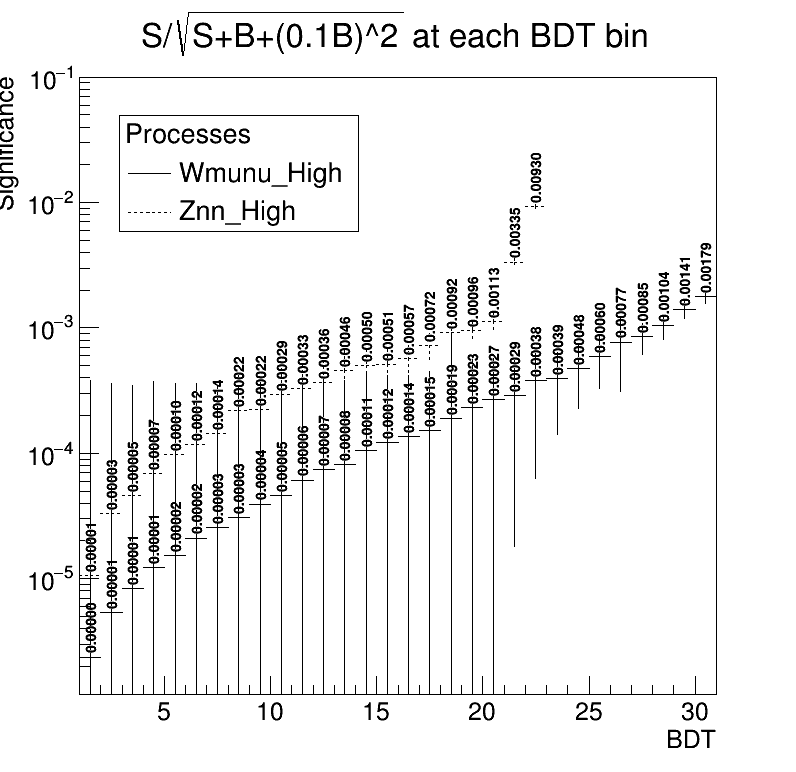

In [7]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPaintTextFormat('.5f')
c2 = ROOT.TCanvas('c','c',800,800)

c2.cd()
ROOT.gPad.SetLogy()
h1.SetMaximum(0.1)

h1.SetLineColor(ROOT.kBlack)
h1.Draw("text")
h1.SetTitle("S/#sqrt{S+B+(0.1B)^2} at each BDT bin")
h1.GetXaxis().SetTitle('BDT')
h1.GetYaxis().SetTitle('Significance')

h2.SetLineColor(ROOT.kBlack)
h2.Draw('text same')


legend = ROOT.TLegend(0.15,0.7,0.45,0.85);
legend.SetHeader("Processes")
legend.AddEntry(h1,"Wmunu_High","pl");
legend.AddEntry(h2,"Znn_High","pl");
legend.Draw();

c2.Draw()

Compare baseline between WHH Semilep and hadronic channels

In [2]:
f1 = ROOT.TFile.Open("/Users/longwang/Desktop/WHH_semilep.root")
f2 = ROOT.TFile.Open("/Users/longwang/Desktop/bosonKinematics.root")
tree1 = f1.Get("Events")
tree2 = f2.Get("Events")

In [3]:
h1_VHH_V_H1_dPhi = ROOT.TH1F("h1_VHH_V_H1_dPhi", "h1_VHH_V_H1_dPhi", 640, -3.2, 3.2)
h1_VHH_H2H1_pt_ratio = ROOT.TH1F("h1_VHH_H2H1_pt_ratio", "h1_VHH_H2H1_pt_ratio", 100, 0, 1)
h1_VHH_HH_dR = ROOT.TH1F("h1_VHH_HH_dR", "h1_VHH_HH_dR", 500, 0, 5)
h1_VHH_H1_eta = ROOT.TH1F("h1_VHH_H1_eta", "h1_VHH_H1_eta", 800, -4, 4)
h1_VHH_H2_e = ROOT.TH1F("h1_VHH_H2_e", "h1_VHH_H2_e", 100, 0, 1000)
h1_VHH_HH_deta = ROOT.TH1F("h1_VHH_HH_deta", "h1_VHH_HH_deta", 100, 0, 5)
h1_VHH_H2_eta = ROOT.TH1F("h1_VHH_H2_eta", "h1_VHH_H2_eta", 800, -4, 4)
h1_VHH_HH_dphi = ROOT.TH1F("h1_VHH_HH_dphi", "h1_VHH_HH_dphi", 640, -3.2, 3.2)
h1_VHH_H1_pT = ROOT.TH1F("h1_VHH_H1_pT", "h1_VHH_H1_pT", 80, 0, 800)
h1_VHH_H2_pT = ROOT.TH1F("h1_VHH_H2_pT", "h1_VHH_H2_pT", 60, 0, 600)
h1_VHH_HH_pT = ROOT.TH1F("h1_VHH_HH_pT", "h1_VHH_HH_pT", 100, 0, 1000)
h1_VHH_V_H2_dPhi = ROOT.TH1F("h1_VHH_V_H2_dPhi", "h1_VHH_V_H2_dPhi", 640, -3.2, 3.2)
h1_VHH_H1_m = ROOT.TH1F("h1_VHH_H1_m", "h1_VHH_H1_m", 100, 0, 500)
h1_V_pt = ROOT.TH1F("h1_V_pt", "h1_V_pt", 80, 0, 800)
h1_VHH_H2_m = ROOT.TH1F("h1_VHH_H2_m", "h1_VHH_H2_m", 100, 0, 400)
h1_VHH_H1_e = ROOT.TH1F("h1_VHH_H1_e", "h1_VHH_H1_e", 140, 0, 1400)
h1_VHH_HH_m = ROOT.TH1F("h1_VHH_HH_m", "h1_VHH_HH_m", 100, 0, 1000)
h1_VHH_HH_eta = ROOT.TH1F("h1_VHH_HH_eta", "h1_VHH_HH_eta", 800, -4, 4)
h1_VHH_HH_e = ROOT.TH1F("h1_VHH_HH_e", "h1_VHH_HH_e", 200, 0, 2000)

for entry in tqdm(tree1):
    h1_VHH_V_H1_dPhi.Fill(entry.VHH_V_H1_dPhi)
    h1_VHH_H2H1_pt_ratio.Fill(entry.VHH_H2H1_pt_ratio)
    h1_VHH_HH_dR.Fill(entry.VHH_HH_dR)
    h1_VHH_H1_eta.Fill(entry.VHH_H1_eta)
    h1_VHH_H2_e.Fill(entry.VHH_H2_e)
    h1_VHH_HH_deta.Fill(entry.VHH_HH_deta)
    h1_VHH_H2_eta.Fill(entry.VHH_H2_eta)
    h1_VHH_HH_dphi.Fill(entry.VHH_HH_dphi)
    h1_VHH_H1_pT.Fill(entry.VHH_H1_pT)
    h1_VHH_H2_pT.Fill(entry.VHH_H2_pT)
    h1_VHH_HH_pT.Fill(entry.VHH_HH_pT)
    h1_VHH_V_H2_dPhi.Fill(entry.VHH_V_H2_dPhi)
    h1_VHH_H1_m.Fill(entry.VHH_H1_m)
    h1_V_pt.Fill(entry.V_pt)
    h1_VHH_H2_m.Fill(entry.VHH_H2_m)
    h1_VHH_H1_e.Fill(entry.VHH_H1_e)
    h1_VHH_HH_m.Fill(entry.VHH_HH_m)
    h1_VHH_HH_eta.Fill(entry.VHH_HH_eta)
    h1_VHH_HH_e.Fill(entry.VHH_HH_e)

177952it [29:48, 99.52it/s] 


In [4]:
h2_VHH_V_H1_dPhi = ROOT.TH1F("h2_VHH_V_H1_dPhi", "h2_VHH_V_H1_dPhi", 640, -3.2, 3.2)
h2_VHH_H2H1_pt_ratio = ROOT.TH1F("h2_VHH_H2H1_pt_ratio", "h2_VHH_H2H1_pt_ratio", 100, 0, 1)
h2_VHH_HH_dR = ROOT.TH1F("h2_VHH_HH_dR", "h2_VHH_HH_dR", 500, 0, 5)
h2_VHH_H1_eta = ROOT.TH1F("h2_VHH_H1_eta", "h2_VHH_H1_eta", 800, -4, 4)
h2_VHH_H2_e = ROOT.TH1F("h2_VHH_H2_e", "h2_VHH_H2_e", 100, 0, 1000)
h2_VHH_HH_deta = ROOT.TH1F("h2_VHH_HH_deta", "h2_VHH_HH_deta", 100, 0, 5)
h2_VHH_H2_eta = ROOT.TH1F("h2_VHH_H2_eta", "h2_VHH_H2_eta", 800, -4, 4)
h2_VHH_HH_dphi = ROOT.TH1F("h2_VHH_HH_dphi", "h2_VHH_HH_dphi", 640, -3.2, 3.2)
h2_VHH_H1_pT = ROOT.TH1F("h2_VHH_H1_pT", "h2_VHH_H1_pT", 80, 0, 800)
h2_VHH_H2_pT = ROOT.TH1F("h2_VHH_H2_pT", "h2_VHH_H2_pT", 60, 0, 600)
h2_VHH_HH_pT = ROOT.TH1F("h2_VHH_HH_pT", "h2_VHH_HH_pT", 100, 0, 1000)
h2_VHH_V_H2_dPhi = ROOT.TH1F("h2_VHH_V_H2_dPhi", "h2_VHH_V_H2_dPhi", 640, -3.2, 3.2)
h2_VHH_H1_m = ROOT.TH1F("h2_VHH_H1_m", "h2_VHH_H1_m", 100, 0, 500)
h2_V_pt = ROOT.TH1F("h2_V_pt", "h2_V_pt", 80, 0, 800)
h2_VHH_H2_m = ROOT.TH1F("h2_VHH_H2_m", "h2_VHH_H2_m", 100, 0, 400)
h2_VHH_H1_e = ROOT.TH1F("h2_VHH_H1_e", "h2_VHH_H1_e", 140, 0, 1400)
h2_VHH_HH_m = ROOT.TH1F("h2_VHH_HH_m", "h2_VHH_HH_m", 100, 0, 1000)
h2_VHH_HH_eta = ROOT.TH1F("h2_VHH_HH_eta", "h2_VHH_HH_eta", 800, -4, 4)
h2_VHH_HH_e = ROOT.TH1F("h2_VHH_HH_e", "h2_VHH_HH_e", 200, 0, 2000)

for entry in tqdm(tree2):
    h2_VHH_V_H1_dPhi.Fill(entry.VHH_V_H1_dPhi, entry.weight)
    h2_VHH_H2H1_pt_ratio.Fill(entry.VHH_H2H1_pt_ratio, entry.weight)
    h2_VHH_HH_dR.Fill(entry.VHH_HH_dR, entry.weight)
    h2_VHH_H1_eta.Fill(entry.VHH_H1_eta, entry.weight)
    h2_VHH_H2_e.Fill(entry.VHH_H2_e, entry.weight)
    h2_VHH_HH_deta.Fill(entry.VHH_HH_deta, entry.weight)
    h2_VHH_H2_eta.Fill(entry.VHH_H2_eta, entry.weight)
    h2_VHH_HH_dphi.Fill(entry.VHH_HH_dphi, entry.weight)
    h2_VHH_H1_pT.Fill(entry.VHH_H1_pT, entry.weight)
    h2_VHH_H2_pT.Fill(entry.VHH_H2_pT, entry.weight)
    h2_VHH_HH_pT.Fill(entry.VHH_HH_pT, entry.weight)
    h2_VHH_V_H2_dPhi.Fill(entry.VHH_V_H2_dPhi, entry.weight)
    h2_VHH_H1_m.Fill(entry.VHH_H1_m, entry.weight)
    h2_V_pt.Fill(entry.V_pt, entry.weight)
    h2_VHH_H2_m.Fill(entry.VHH_H2_m, entry.weight)
    h2_VHH_H1_e.Fill(entry.VHH_H1_e, entry.weight)
    h2_VHH_HH_m.Fill(entry.VHH_HH_m, entry.weight)
    h2_VHH_HH_eta.Fill(entry.VHH_HH_eta, entry.weight)
    h2_VHH_HH_e.Fill(entry.VHH_HH_e, entry.weight)

16205it [00:04, 3984.73it/s]


In [5]:
ROOT.gStyle.SetOptStat(0)

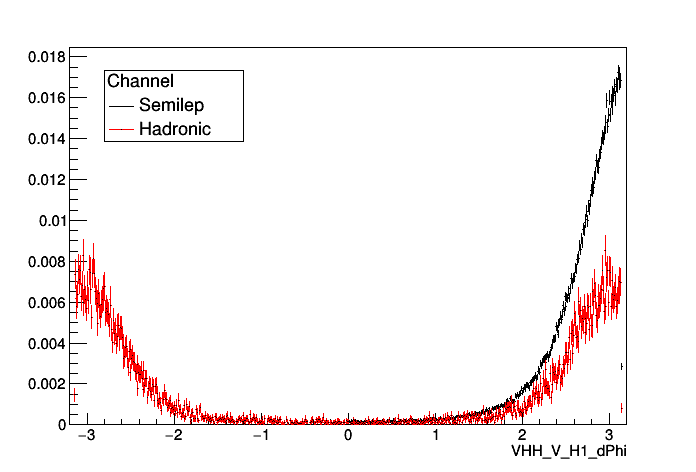

In [6]:
h1_VHH_V_H1_dPhi.Scale(1./h1_VHH_V_H1_dPhi.Integral())
h2_VHH_V_H1_dPhi.Scale(1./h2_VHH_V_H1_dPhi.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_V_H1_dPhi.SetTitle("")
h1_VHH_V_H1_dPhi.GetXaxis().SetTitle("VHH_V_H1_dPhi")
h1_VHH_V_H1_dPhi.SetLineColor(ROOT.kBlack)
h1_VHH_V_H1_dPhi.Draw()
h2_VHH_V_H1_dPhi.SetLineColor(ROOT.kRed)
h2_VHH_V_H1_dPhi.Draw('sames')

legend = ROOT.TLegend(0.15,0.7,0.35,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_V_H1_dPhi,"Semilep","pl");
legend.AddEntry(h2_VHH_V_H1_dPhi,"Hadronic","pl");
legend.Draw();

c.Draw()

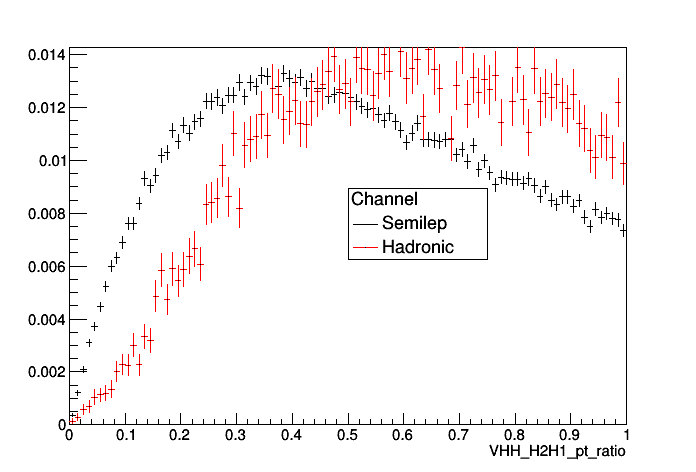

In [7]:
h1_VHH_H2H1_pt_ratio.Scale(1./h1_VHH_H2H1_pt_ratio.Integral())
h2_VHH_H2H1_pt_ratio.Scale(1./h2_VHH_H2H1_pt_ratio.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H2H1_pt_ratio.SetTitle("")
h1_VHH_H2H1_pt_ratio.GetXaxis().SetTitle("VHH_H2H1_pt_ratio")
h1_VHH_H2H1_pt_ratio.SetLineColor(ROOT.kBlack)
h1_VHH_H2H1_pt_ratio.Draw()
h2_VHH_H2H1_pt_ratio.SetLineColor(ROOT.kRed)
h2_VHH_H2H1_pt_ratio.Draw('sames')

legend = ROOT.TLegend(0.5,0.45,0.7,0.6);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H2H1_pt_ratio,"Semilep","pl");
legend.AddEntry(h2_VHH_H2H1_pt_ratio,"Hadronic","pl");
legend.Draw();

c.Draw()

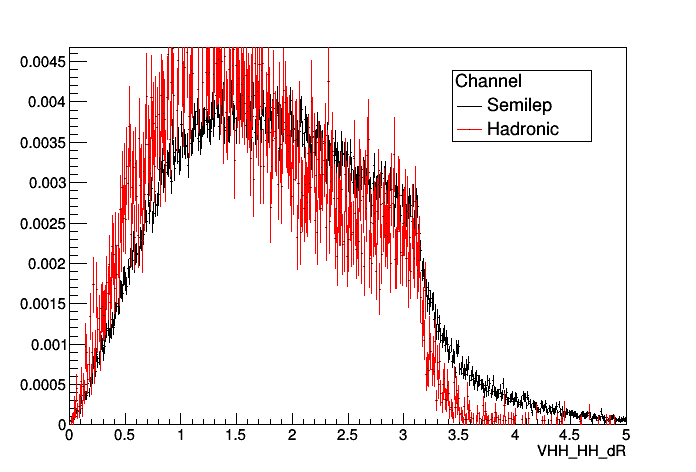

In [8]:
h1_VHH_HH_dR.Scale(1./h1_VHH_HH_dR.Integral())
h2_VHH_HH_dR.Scale(1./h2_VHH_HH_dR.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_HH_dR.SetTitle("")
h1_VHH_HH_dR.GetXaxis().SetTitle("VHH_HH_dR")
h1_VHH_HH_dR.SetLineColor(ROOT.kBlack)
h1_VHH_HH_dR.Draw()
h2_VHH_HH_dR.SetLineColor(ROOT.kRed)
h2_VHH_HH_dR.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_HH_dR,"Semilep","pl");
legend.AddEntry(h2_VHH_HH_dR,"Hadronic","pl");
legend.Draw();

c.Draw()

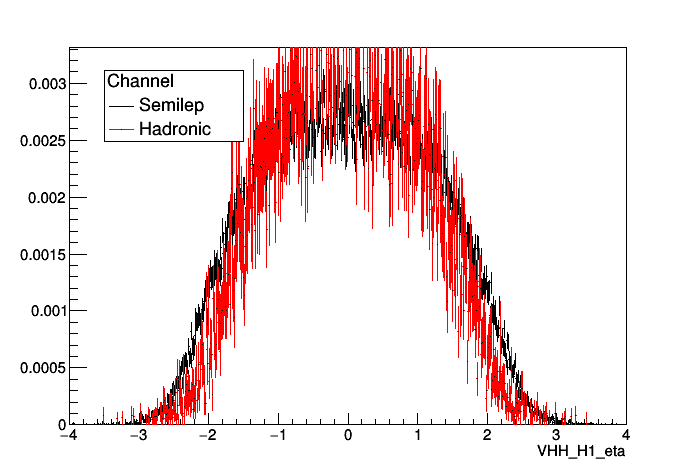

In [9]:
h1_VHH_H1_eta.Scale(1./h1_VHH_H1_eta.Integral())
h2_VHH_H1_eta.Scale(1./h2_VHH_H1_eta.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H1_eta.SetTitle("")
h1_VHH_H1_eta.GetXaxis().SetTitle("VHH_H1_eta")
h1_VHH_H1_eta.SetLineColor(ROOT.kBlack)
h1_VHH_H1_eta.Draw()
h2_VHH_H1_eta.SetLineColor(ROOT.kRed)
h2_VHH_H1_eta.Draw('sames')

legend = ROOT.TLegend(0.15,0.7,0.35,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H1_eta,"Semilep","pl");
legend.AddEntry(h2_VHH_H1_eta,"Hadronic","pl");
legend.Draw();

c.Draw()

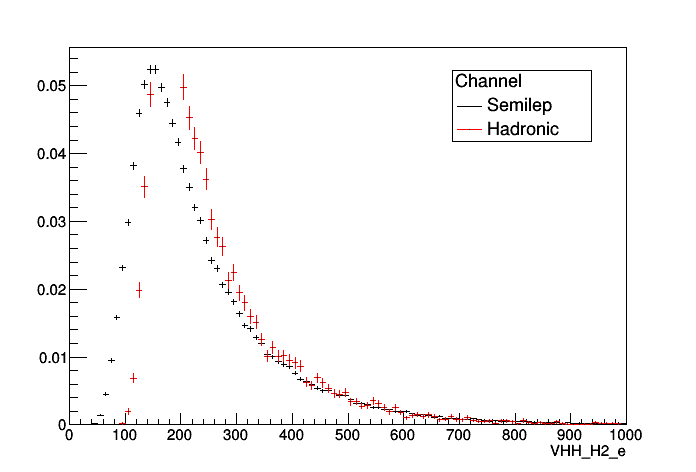

In [10]:
h1_VHH_H2_e.Scale(1./h1_VHH_H2_e.Integral())
h2_VHH_H2_e.Scale(1./h2_VHH_H2_e.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H2_e.SetTitle("")
h1_VHH_H2_e.GetXaxis().SetTitle("VHH_H2_e")
h1_VHH_H2_e.SetLineColor(ROOT.kBlack)
h1_VHH_H2_e.Draw()
h2_VHH_H2_e.SetLineColor(ROOT.kRed)
h2_VHH_H2_e.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H2_e,"Semilep","pl");
legend.AddEntry(h2_VHH_H2_e,"Hadronic","pl");
legend.Draw();

c.Draw()

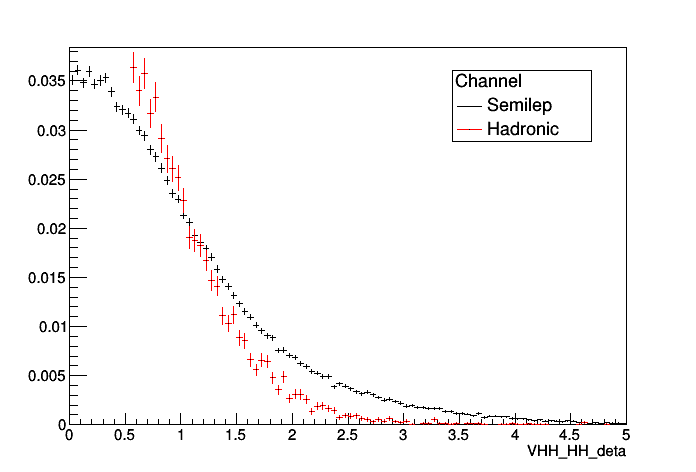

In [11]:
h1_VHH_HH_deta.Scale(1./h1_VHH_HH_deta.Integral())
h2_VHH_HH_deta.Scale(1./h2_VHH_HH_deta.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_HH_deta.SetTitle("")
h1_VHH_HH_deta.GetXaxis().SetTitle("VHH_HH_deta")
h1_VHH_HH_deta.SetLineColor(ROOT.kBlack)
h1_VHH_HH_deta.Draw()
h2_VHH_HH_deta.SetLineColor(ROOT.kRed)
h2_VHH_HH_deta.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_HH_deta,"Semilep","pl");
legend.AddEntry(h2_VHH_HH_deta,"Hadronic","pl");
legend.Draw();

c.Draw()

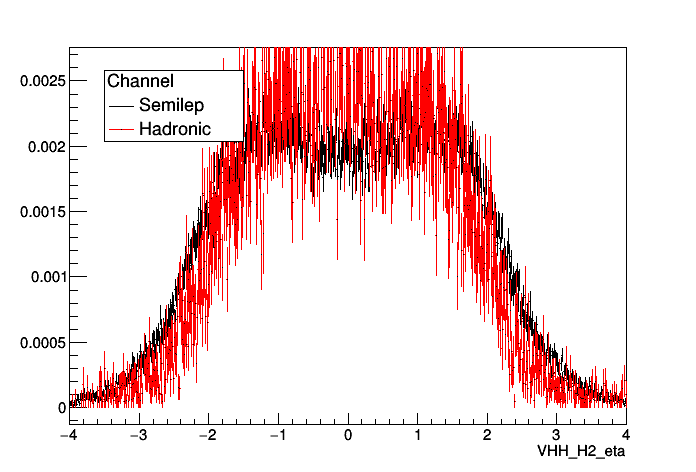

In [12]:
h1_VHH_H2_eta.Scale(1./h1_VHH_H2_eta.Integral())
h2_VHH_H2_eta.Scale(1./h2_VHH_H2_eta.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H2_eta.SetTitle("")
h1_VHH_H2_eta.GetXaxis().SetTitle("VHH_H2_eta")
h1_VHH_H2_eta.SetLineColor(ROOT.kBlack)
h1_VHH_H2_eta.Draw()
h2_VHH_H2_eta.SetLineColor(ROOT.kRed)
h2_VHH_H2_eta.Draw('sames')

legend = ROOT.TLegend(0.15,0.7,0.35,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H2_eta,"Semilep","pl");
legend.AddEntry(h2_VHH_H2_eta,"Hadronic","pl");
legend.Draw();

c.Draw()

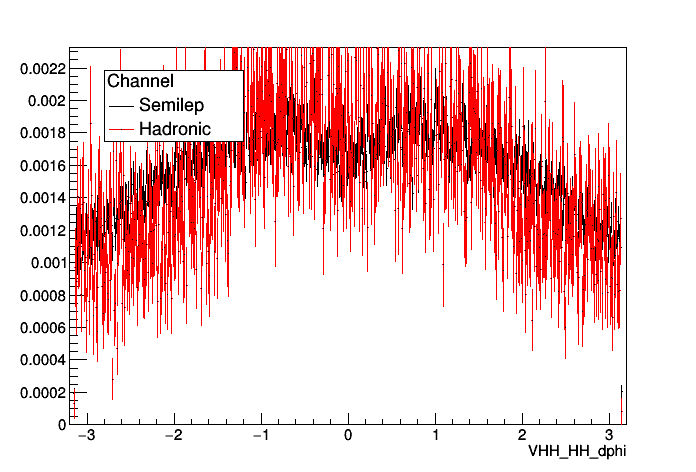

In [13]:
h1_VHH_HH_dphi.Scale(1./h1_VHH_HH_dphi.Integral())
h2_VHH_HH_dphi.Scale(1./h2_VHH_HH_dphi.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_HH_dphi.SetTitle("")
h1_VHH_HH_dphi.GetXaxis().SetTitle("VHH_HH_dphi")
h1_VHH_HH_dphi.SetLineColor(ROOT.kBlack)
h1_VHH_HH_dphi.Draw()
h2_VHH_HH_dphi.SetLineColor(ROOT.kRed)
h2_VHH_HH_dphi.Draw('sames')

legend = ROOT.TLegend(0.15,0.7,0.35,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_HH_dphi,"Semilep","pl");
legend.AddEntry(h2_VHH_HH_dphi,"Hadronic","pl");
legend.Draw();

c.Draw()

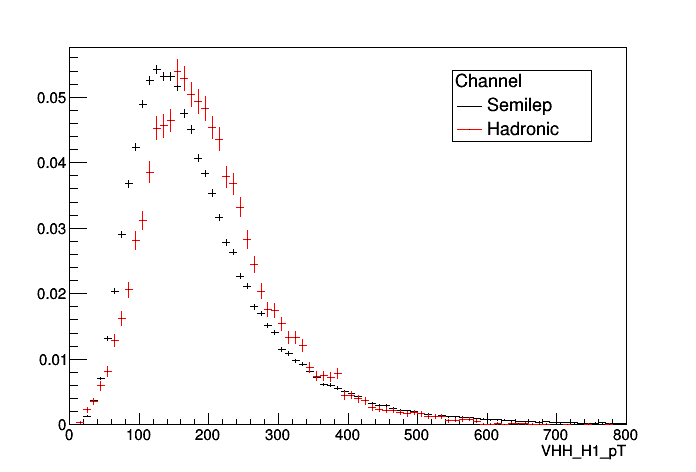

In [14]:
h1_VHH_H1_pT.Scale(1./h1_VHH_H1_pT.Integral())
h2_VHH_H1_pT.Scale(1./h2_VHH_H1_pT.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H1_pT.SetTitle("")
h1_VHH_H1_pT.GetXaxis().SetTitle("VHH_H1_pT")
h1_VHH_H1_pT.SetLineColor(ROOT.kBlack)
h1_VHH_H1_pT.Draw()
h2_VHH_H1_pT.SetLineColor(ROOT.kRed)
h2_VHH_H1_pT.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H1_pT,"Semilep","pl");
legend.AddEntry(h2_VHH_H1_pT,"Hadronic","pl");
legend.Draw();

c.Draw()

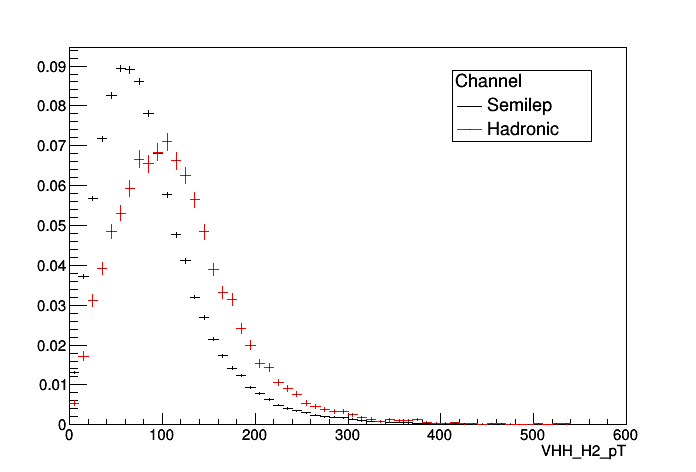

In [15]:
h1_VHH_H2_pT.Scale(1./h1_VHH_H2_pT.Integral())
h2_VHH_H2_pT.Scale(1./h2_VHH_H2_pT.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H2_pT.SetTitle("")
h1_VHH_H2_pT.GetXaxis().SetTitle("VHH_H2_pT")
h1_VHH_H2_pT.SetLineColor(ROOT.kBlack)
h1_VHH_H2_pT.Draw()
h2_VHH_H2_pT.SetLineColor(ROOT.kRed)
h2_VHH_H2_pT.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H2_pT,"Semilep","pl");
legend.AddEntry(h2_VHH_H2_pT,"Hadronic","pl");
legend.Draw();

c.Draw()

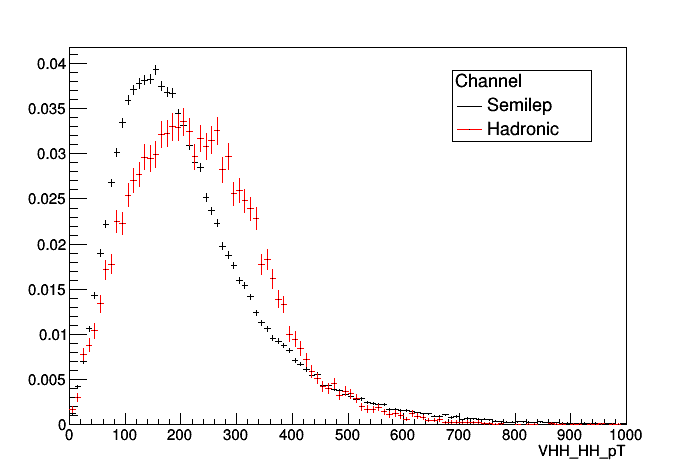

In [16]:
h1_VHH_HH_pT.Scale(1./h1_VHH_HH_pT.Integral())
h2_VHH_HH_pT.Scale(1./h2_VHH_HH_pT.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_HH_pT.SetTitle("")
h1_VHH_HH_pT.GetXaxis().SetTitle("VHH_HH_pT")
h1_VHH_HH_pT.SetLineColor(ROOT.kBlack)
h1_VHH_HH_pT.Draw()
h2_VHH_HH_pT.SetLineColor(ROOT.kRed)
h2_VHH_HH_pT.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_HH_pT,"Semilep","pl");
legend.AddEntry(h2_VHH_HH_pT,"Hadronic","pl");
legend.Draw();

c.Draw()

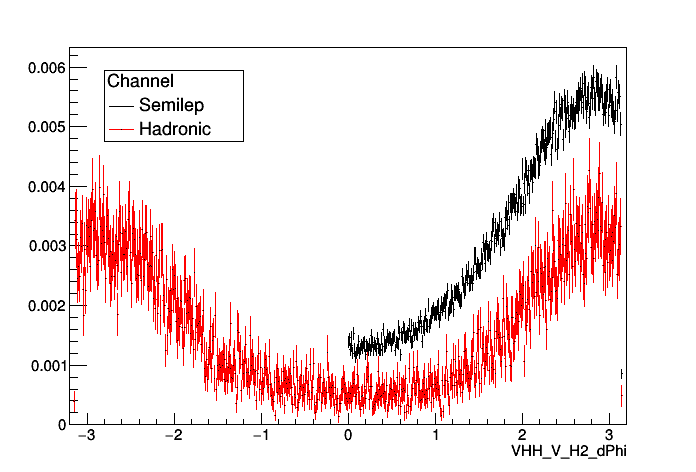

In [17]:
h1_VHH_V_H2_dPhi.Scale(1./h1_VHH_V_H2_dPhi.Integral())
h2_VHH_V_H2_dPhi.Scale(1./h2_VHH_V_H2_dPhi.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_V_H2_dPhi.SetTitle("")
h1_VHH_V_H2_dPhi.GetXaxis().SetTitle("VHH_V_H2_dPhi")
h1_VHH_V_H2_dPhi.SetLineColor(ROOT.kBlack)
h1_VHH_V_H2_dPhi.Draw()
h2_VHH_V_H2_dPhi.SetLineColor(ROOT.kRed)
h2_VHH_V_H2_dPhi.Draw('sames')

legend = ROOT.TLegend(0.15,0.7,0.35,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_V_H2_dPhi,"Semilep","pl");
legend.AddEntry(h2_VHH_V_H2_dPhi,"Hadronic","pl");
legend.Draw();

c.Draw()

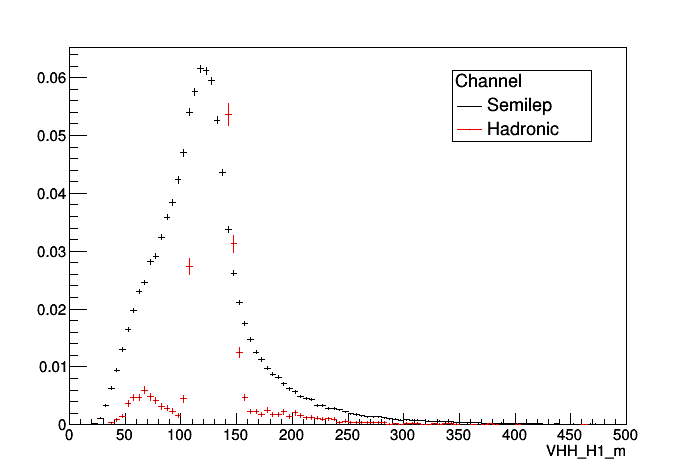

In [18]:
h1_VHH_H1_m.Scale(1./h1_VHH_H1_m.Integral())
h2_VHH_H1_m.Scale(1./h2_VHH_H1_m.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H1_m.SetTitle("")
h1_VHH_H1_m.GetXaxis().SetTitle("VHH_H1_m")
h1_VHH_H1_m.SetLineColor(ROOT.kBlack)
h1_VHH_H1_m.Draw()
h2_VHH_H1_m.SetLineColor(ROOT.kRed)
h2_VHH_H1_m.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H1_m,"Semilep","pl");
legend.AddEntry(h2_VHH_H1_m,"Hadronic","pl");
legend.Draw();

c.Draw()

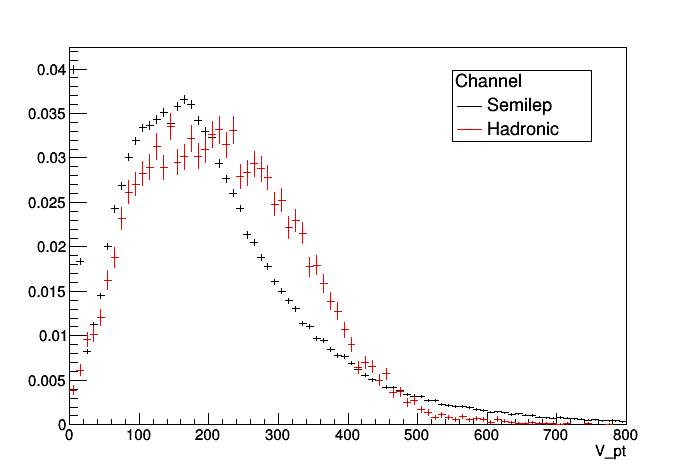

In [19]:
h1_V_pt.Scale(1./h1_V_pt.Integral())
h2_V_pt.Scale(1./h2_V_pt.Integral())

c = ROOT.TCanvas()
c.cd()
h1_V_pt.SetTitle("")
h1_V_pt.GetXaxis().SetTitle("V_pt")
h1_V_pt.SetLineColor(ROOT.kBlack)
h1_V_pt.Draw()
h2_V_pt.SetLineColor(ROOT.kRed)
h2_V_pt.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_V_pt,"Semilep","pl");
legend.AddEntry(h2_V_pt,"Hadronic","pl");
legend.Draw();

c.Draw()

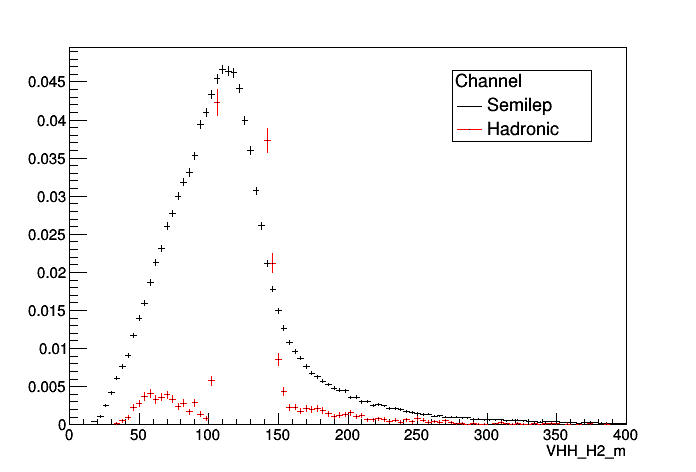

In [20]:
h1_VHH_H2_m.Scale(1./h1_VHH_H2_m.Integral())
h2_VHH_H2_m.Scale(1./h2_VHH_H2_m.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H2_m.SetTitle("")
h1_VHH_H2_m.GetXaxis().SetTitle("VHH_H2_m")
h1_VHH_H2_m.SetLineColor(ROOT.kBlack)
h1_VHH_H2_m.Draw()
h2_VHH_H2_m.SetLineColor(ROOT.kRed)
h2_VHH_H2_m.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H2_m,"Semilep","pl");
legend.AddEntry(h2_VHH_H2_m,"Hadronic","pl");
legend.Draw();

c.Draw()

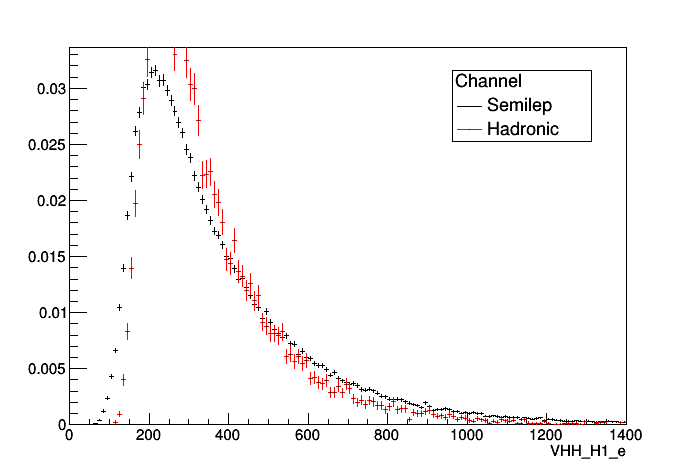

In [21]:
h1_VHH_H1_e.Scale(1./h1_VHH_H1_e.Integral())
h2_VHH_H1_e.Scale(1./h2_VHH_H1_e.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_H1_e.SetTitle("")
h1_VHH_H1_e.GetXaxis().SetTitle("VHH_H1_e")
h1_VHH_H1_e.SetLineColor(ROOT.kBlack)
h1_VHH_H1_e.Draw()
h2_VHH_H1_e.SetLineColor(ROOT.kRed)
h2_VHH_H1_e.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_H1_e,"Semilep","pl");
legend.AddEntry(h2_VHH_H1_e,"Hadronic","pl");
legend.Draw();

c.Draw()

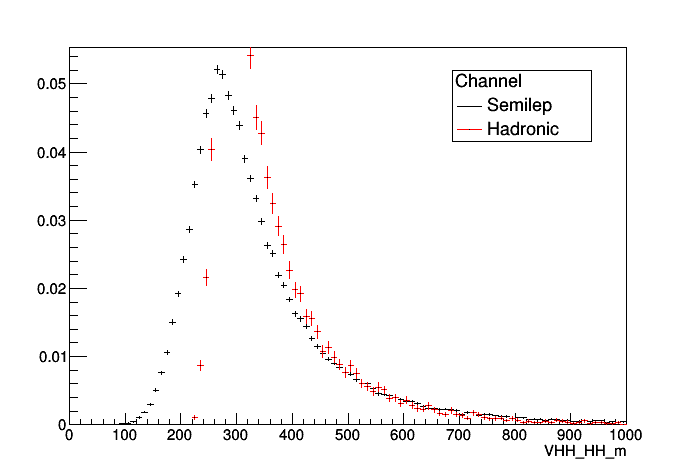

In [22]:
h1_VHH_HH_m.Scale(1./h1_VHH_HH_m.Integral())
h2_VHH_HH_m.Scale(1./h2_VHH_HH_m.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_HH_m.SetTitle("")
h1_VHH_HH_m.GetXaxis().SetTitle("VHH_HH_m")
h1_VHH_HH_m.SetLineColor(ROOT.kBlack)
h1_VHH_HH_m.Draw()
h2_VHH_HH_m.SetLineColor(ROOT.kRed)
h2_VHH_HH_m.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_HH_m,"Semilep","pl");
legend.AddEntry(h2_VHH_HH_m,"Hadronic","pl");
legend.Draw();

c.Draw()

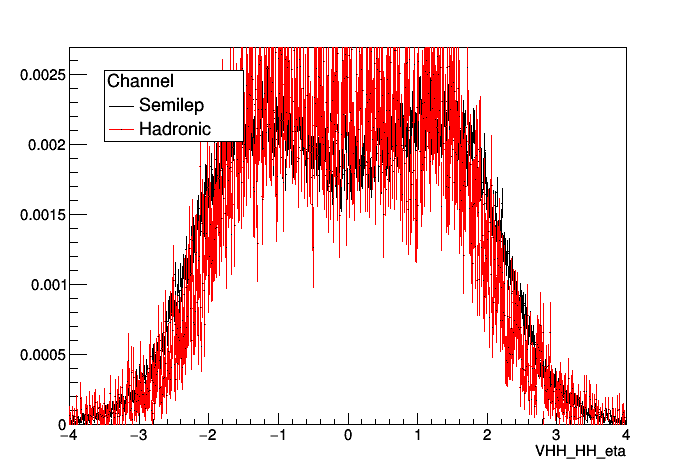

In [23]:
h1_VHH_HH_eta.Scale(1./h1_VHH_HH_eta.Integral())
h2_VHH_HH_eta.Scale(1./h2_VHH_HH_eta.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_HH_eta.SetTitle("")
h1_VHH_HH_eta.GetXaxis().SetTitle("VHH_HH_eta")
h1_VHH_HH_eta.SetLineColor(ROOT.kBlack)
h1_VHH_HH_eta.Draw()
h2_VHH_HH_eta.SetLineColor(ROOT.kRed)
h2_VHH_HH_eta.Draw('sames')

legend = ROOT.TLegend(0.15,0.7,0.35,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_HH_eta,"Semilep","pl");
legend.AddEntry(h2_VHH_HH_eta,"Hadronic","pl");
legend.Draw();

c.Draw()

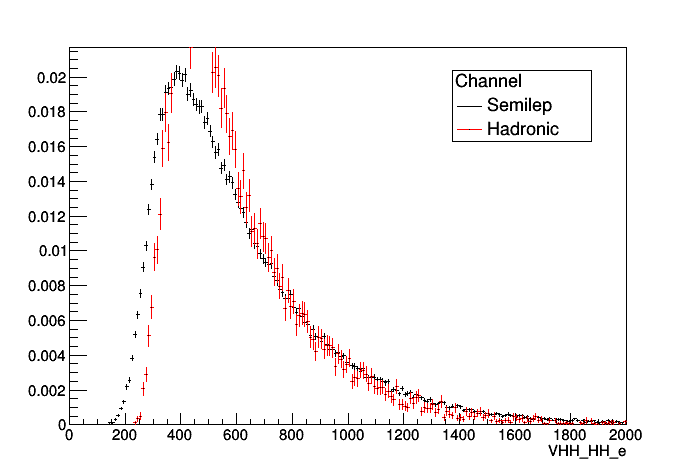

In [24]:
h1_VHH_HH_e.Scale(1./h1_VHH_HH_e.Integral())
h2_VHH_HH_e.Scale(1./h2_VHH_HH_e.Integral())

c = ROOT.TCanvas()
c.cd()
h1_VHH_HH_e.SetTitle("")
h1_VHH_HH_e.GetXaxis().SetTitle("VHH_HH_e")
h1_VHH_HH_e.SetLineColor(ROOT.kBlack)
h1_VHH_HH_e.Draw()
h2_VHH_HH_e.SetLineColor(ROOT.kRed)
h2_VHH_HH_e.Draw('sames')

legend = ROOT.TLegend(0.65,0.7,0.85,0.85);
legend.SetHeader("Channel")
legend.AddEntry(h1_VHH_HH_e,"Semilep","pl");
legend.AddEntry(h2_VHH_HH_e,"Hadronic","pl");
legend.Draw();

c.Draw()